## **Data Assessment**

## **Mengimpor libaries** 
Dalam bagian ini, kita akan mengimpor beberapa library yang diperlukan untuk memproses data dalam format JSON serta untuk analisis dan visualisasi data. Library yang akan kita gunakan adalah:

- **pandas**: Untuk manipulasi dan analisis data.
- **numpy**: Untuk operasi numerik dan manipulasi array.
- **json**: Untuk bekerja dengan data dalam format JSON.
- **matplotlib.pyplot**: Untuk visualisasi data.
- **seaborn**: Untuk visualisasi data yang lebih menarik dan informatif.

In [2]:
# Mengimpor libaries pandas,numpy dan json untuk memproses data dalam format JSON
import pandas as pd
import numpy as np
import json
import matplotlib.pyplot as plt
import seaborn as sns

# import warning to ignore warning
import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', None)

## **Install mysql connector**

In [3]:
# install mysql connector
!pip install mysql-connector-python

In [4]:
# import libraries
import mysql.connector
from mysql.connector import Error

In [5]:
# Define MySQL details
host   = 'okegarden-laravel-prod-db-2024-11-15-0200.cgwhhgh85mr3.ap-southeast-3.rds.amazonaws.com'
port   = '3306'
user   = 'intern_mes'
passwd = 'sdfDFLES342982Ddlsdksd'
databs = 'okegarden_laravel_prod_db'

In [6]:
# function to fetch data from database, the connection is closed after use.
def fetch_data(host_name, port_name, user_name, user_password, db_name, query, params=None):
    try:
        # use with to ensure the connection is closed after use
        with mysql.connector.connect(
            host=host_name,
            port=port_name,
            user=user_name,
            password=user_password,
            database=db_name
        ) as connection:
            data = pd.read_sql(query, connection, params=params) # read the query to dataframe format
            return data

    except Error as e:
        print(f"Error while connecting to MySQL or fetching data: {e}")
        return None

### **Mengambil Data dari Database 'okegarden_laravel_prod_db' Menggunakan Query SQL**

### Tabel Yang Di Gunakan

In [7]:
# Query Data
query = """
    SELECT
        act.id,
        act.subject_type,
        act.subject_id,
        act.properties,
        act.created_at,
        act.updated_at,
        dt.id as id_datetime
    FROM
        activity_log act
    LEFT JOIN
        datetime dt ON act.subject_id = dt.datetimeable_id
"""

Kami menggunakan dua tabel, yaitu **`activity_log`** dan **`datetime`**, untuk menyelesaikan menjawab promblem statment di atas. Tabel **`activity_log`** berfungsi mencatat aktivitas terkait objek tertentu, sedangkan tabel **`datetime`** digunakan untuk melengkapi data waktu yang relevan. Kedua tabel ini digabungkan berdasarkan hubungan antara **`subject_id`** dan **`datetimeable_id`** untuk mendapatkan data yang diperlukan dalam analisis.

#### **Mengambil Data**
Setelah mendefinisikan query, kita akan menggunakan fungsi fetch_data untuk mengeksekusi query dan mengambil data dari database.

In [8]:
data = fetch_data(host, port, user, passwd, databs, query)

### **Explore Data**

In [9]:
# Menampilkan 5 baris pertama data.
data.head()

,id,subject_type,subject_id,properties,created_at,updated_at,id_datetime
0,24,App\Models\User,102,"{""attributes"":{""id_user"":102,""id_role"":2,""name...",2024-10-21 17:54:34,2024-10-21 17:54:34,2.0
1,33,App\Models\User,102,"{""attributes"":{""id_user"":102,""id_role"":2,""name...",2024-10-21 20:04:35,2024-10-21 20:04:35,2.0
2,34,App\Models\User,102,"{""attributes"":{""id_user"":102,""id_role"":2,""name...",2024-10-21 20:05:00,2024-10-21 20:05:00,2.0
3,35,App\Models\User,102,"{""attributes"":{""id_user"":102,""id_role"":2,""name...",2024-10-21 20:05:06,2024-10-21 20:05:06,2.0
4,42,App\Models\User,102,"{""attributes"":{""id_user"":102,""id_role"":2,""name...",2024-10-21 23:08:53,2024-10-21 23:08:53,2.0


In [10]:
pd.DataFrame({'dataFeatures' : data.columns, 'dataType' : data.dtypes.values, 
              'null' : [data[i].isna().sum() for i in data.columns],
              'nullPct' : [((data[i].isna().sum()/len(data[i]))*100).round(1) for i in data.columns],
              'Nunique' : [data[i].nunique() for i in data.columns],
              'uniqueSample' : [list(pd.Series(data[i].unique()).sample(2)) for i in data.columns]}).reset_index(drop = True)

,dataFeatures,dataType,null,nullPct,Nunique,uniqueSample
0,id,int64,0,0.0,16521,"[16186, 13360]"
1,subject_type,object,0,0.0,23,"[App\Models\Lead, App\Models\User]"
2,subject_id,int64,0,0.0,13403,"[4054, 7093]"
3,properties,object,0,0.0,16521,"[{""attributes"":{""id_desc"":42824,""id_design"":54..."
4,created_at,datetime64[ns],0,0.0,2302,"[2024-11-09 22:01:27, 2024-11-03 08:09:54]"
5,updated_at,datetime64[ns],0,0.0,2302,"[2024-11-08 09:58:14, 2024-11-08 23:44:05]"
6,id_datetime,float64,15859,94.5,127,"[82.0, 131.0]"


In [11]:
# Menampilkan jumlah kolom dan jumlah baris dalam order_proses
print(f"Jumlah kolom: {data.shape[1]}, Jumlah baris: {data.shape[0]}")

Jumlah kolom: 7, Jumlah baris: 16777


In [12]:
data.describe()

,id,subject_id,created_at,updated_at,id_datetime
count,16777.000000,16777.000000,16777,16777,918.000000
mean,8272.914168,21863.431484,2024-11-05 01:06:05.260535296,2024-11-05 01:06:05.260535296,70.465142
min,1.000000,1.000000,2024-10-21 15:54:24,2024-10-21 15:54:24,1.000000
25%,4123.000000,1920.000000,2024-11-02 17:25:15,2024-11-02 17:25:15,38.000000
50%,8266.000000,21693.000000,2024-11-05 18:38:25,2024-11-05 18:38:25,76.000000
75%,12446.000000,43078.000000,2024-11-06 13:29:12,2024-11-06 13:29:12,109.000000
max,16522.000000,46773.000000,2024-11-15 09:00:07,2024-11-15 09:00:07,138.000000
std,4775.888733,18433.794384,NaN,NaN,44.158266


pada column created_at dan updated_at:  
- Rentang waktu cukup singkat, dari Oktober 2024 hingga November 2024.   
- Nilai rata-rata, median, dan kuartil menunjukkan distribusi data yang cukup merata dalam periode waktu tersebut.  

## **Data Cleaning**

#### Pada langkah ini, kita berupaya mengidentifikasi baris dan kolom yang berisi nilai yang hilang

In [13]:
# Check null values 
data.isnull().sum()

id                  0
subject_type        0
subject_id          0
properties          0
created_at          0
updated_at          0
id_datetime     15859
dtype: int64

Kolom seperti `id`, `subject_type`, `subject_id`, `properties`, `created_at`, dan `updated_at` memiliki nilai 0 yang menunjukkan tidak ada nilai yang hilang di kolom tersebut. Namun, kolom `id_datetime` memiliki 15,859 missing values.  

**Penjelasan Missing Values:**  
- Missing values pada kolom id_datetime menunjukkan bahwa tidak semua data di tabel activity_log memiliki kecocokan (irisan) di tabel datetime saat proses join dilakukan.
- Hal ini bisa terjadi karena ada entri di tabel activity_log dengan subject_id tertentu yang tidak memiliki pasangan datetimeable_id yang sesuai di tabel datetime.
- Missing values ini muncul akibat proses left join, yang tetap menyertakan semua baris dari tabel activity_log, meskipun tidak ada pasangan di tabel datetime. Data yang tidak memiliki pasangan pada kolom id_datetime otomatis terisi dengan nilai kosong atau null.

Kami memutuskan untuk tidak menghapus data yang memiliki nilai null meskipun tidak terdapat irisan pada data tersebut. Keputusan ini didasarkan pada pertimbangan bahwa data tersebut akan di gunakan untuk memberikan informasi atau konteks yang relevan dalam analisis yang akan dilakukan di tahap selanjutnya.

## **Data Transformation Menggunakan Query SQL**

##### Pada tahap ini, kami melakukan serangkaian transformasi data yang bertujuan untuk mempersiapkan data yang akan kami gunakan agar lebih siap untuk analisis mendalam.  
##### Transformasi ini mencakup dua aspek utama: pembuatan kolom baru dan pengubahan tipe data.

### **Query Data**

In [14]:
query = """

WITH order_garden_data AS (
    SELECT
        act.id,
        act.subject_type,
        act.subject_id,
        act.properties,
        act.created_at,
        act.updated_at,
        JSON_UNQUOTE(JSON_EXTRACT(act.properties, '$.old.status')) AS old_status,
        JSON_UNQUOTE(JSON_EXTRACT(properties, '$.old.created_at')) AS old_created_at,
        JSON_UNQUOTE(JSON_EXTRACT(properties, '$.old.updated_at')) AS old_updated_at,
        JSON_UNQUOTE(JSON_EXTRACT(act.properties, '$.attributes.status')) AS attributes_status,
        JSON_UNQUOTE(JSON_EXTRACT(properties, '$.attributes.created_at')) AS attributes_created_at,
        JSON_UNQUOTE(JSON_EXTRACT(properties, '$.attributes.updated_at')) AS attributes_updated_at,
        TIMESTAMPDIFF(SECOND, 
            JSON_UNQUOTE(JSON_EXTRACT(properties, '$.attributes.created_at')),
            JSON_UNQUOTE(JSON_EXTRACT(properties, '$.attributes.updated_at')) 
        ) / 3600 AS order_cycle_time,
        dt.id AS id_datetime,
        TIMESTAMPDIFF(SECOND,
            JSON_UNQUOTE(JSON_EXTRACT(properties, '$.old.updated_at')),
            act.created_at
        ) / 3600 AS time_interval_status
    FROM
        activity_log act
    LEFT JOIN
        datetime dt ON act.subject_id = dt.datetimeable_id
    WHERE 
        subject_type LIKE '%OrderDesign%' 
        OR subject_type LIKE '%OrderGarden%'
        OR subject_type LIKE '%OrderGardenCareDetail%'
        
),
build_start_attributes_status AS (
    SELECT
        act.id,
        act.subject_type,
        act.subject_id,
        act.properties,
        act.created_at,
        dt.updated_at,
        CASE
            WHEN JSON_UNQUOTE(JSON_EXTRACT(act.properties, '$.old.status')) = 'acc_gardener' 
                 AND JSON_UNQUOTE(JSON_EXTRACT(act.properties, '$.attributes.status')) = 'in_review'
            THEN 'acc_gardener'
        END AS old_status,
        JSON_UNQUOTE(JSON_EXTRACT(act.properties, '$.old.created_at')) AS old_created_at,
        JSON_UNQUOTE(JSON_EXTRACT(act.properties, '$.old.updated_at')) AS old_updated_at,
        CASE
            WHEN JSON_UNQUOTE(JSON_EXTRACT(act.properties, '$.old.status')) = 'acc_gardener' 
                 AND JSON_UNQUOTE(JSON_EXTRACT(act.properties, '$.attributes.status')) = 'in_review'
            THEN 'build_start'
        END AS attributes_status,
        dt.created_at AS attributes_created_at,
        dt.updated_at AS attributes_updated_at,
        TIMESTAMPDIFF(
            SECOND, 
            dt.created_at,
            dt.updated_at
        ) / 3600 AS order_cycle_time,
        dt.id AS id_datetime,
        TIMESTAMPDIFF(
            SECOND,
            JSON_UNQUOTE(JSON_EXTRACT(act.properties, '$.old.updated_at')),
            act.created_at
        ) / 3600 AS time_interval_status
    FROM
        activity_log act
    LEFT JOIN
        datetime dt ON act.subject_id = dt.datetimeable_id
    WHERE 
        (
            subject_type LIKE '%OrderDesign%' 
            OR subject_type LIKE '%OrderGarden%'
            OR subject_type LIKE '%OrderGardenCareDetail%'
        )
        AND JSON_UNQUOTE(JSON_EXTRACT(act.properties, '$.old.status')) = 'acc_gardener'
        AND JSON_UNQUOTE(JSON_EXTRACT(act.properties, '$.attributes.status')) = 'in_review'
),
build_start_old_status AS (
    SELECT
        act.id,
        act.subject_type,
        act.subject_id,
        act.properties,
        dt.created_at,
        dt.updated_at,
        CASE
            WHEN JSON_UNQUOTE(JSON_EXTRACT(act.properties, '$.old.status')) = 'acc_gardener' 
                 AND JSON_UNQUOTE(JSON_EXTRACT(act.properties, '$.attributes.status')) = 'in_review'
            THEN 'build_start' 
        END AS old_status,
        dt.created_at AS old_created_at,
        dt.datetime AS old_updated_at,
        CASE
            WHEN JSON_UNQUOTE(JSON_EXTRACT(act.properties, '$.old.status')) = 'acc_gardener' 
                 AND JSON_UNQUOTE(JSON_EXTRACT(act.properties, '$.attributes.status')) = 'in_review'
            THEN 'in_review'
        END AS attributes_status,
        JSON_UNQUOTE(JSON_EXTRACT(act.properties, '$.attributes.created_at')) AS attributes_created_at,
        JSON_UNQUOTE(JSON_EXTRACT(act.properties, '$.attributes.updated_at')) AS attributes_updated_at,
        TIMESTAMPDIFF(
            SECOND, 
            JSON_UNQUOTE(JSON_EXTRACT(act.properties, '$.attributes.created_at')),
            JSON_UNQUOTE(JSON_EXTRACT(act.properties, '$.attributes.updated_at'))
        ) / 3600 AS order_cycle_time,
        dt.id AS id_datetime,
        TIMESTAMPDIFF(
            SECOND,
            dt.created_at,
            dt.datetime
        ) / 3600 AS time_interval_status
    FROM
        activity_log act
    LEFT JOIN
        datetime dt ON act.subject_id = dt.datetimeable_id
    WHERE 
    (
        subject_type LIKE '%OrderDesign%' 
        OR subject_type LIKE '%OrderGarden%'
        OR subject_type LIKE '%OrderGardenCareDetail%'
    )
    AND JSON_UNQUOTE(JSON_EXTRACT(act.properties, '$.old.status')) = 'acc_gardener'
    AND JSON_UNQUOTE(JSON_EXTRACT(act.properties, '$.attributes.status')) = 'in_review'
)
SELECT * FROM (
SELECT * FROM order_garden_data
UNION ALL
SELECT * FROM build_start_attributes_status
UNION ALL
SELECT * FROM build_start_old_status) AS combined_data
ORDER BY id DESC;

"""
order_process = fetch_data(host, port, user, passwd, databs, query)

##### Transformasi dilakukan untuk memperkaya dataset awal dengan kolom tambahan dan metrik berdasarkan informasi dari kolom properties (JSON) serta perhitungan waktu. Berikut langkah transformasinya:
##### Data diambil dari tabel activity_log, yang berisi informasi tentang aktivitas, termasuk properti JSON yang menyimpan detail seperti status lama (`old_status`) dan status baru (`attributes_status`). Tabel ini di-join dengan tabel datetime untuk mendapatkan informasi waktu tambahan.

#### **1. Transformasi Data:** Menggunakan JSON_EXTRACT untuk mengekstrak data dari kolom properties dalam format JSON.
`old_status`: Status lama dari aktivitas.   
`old_created_at`: Waktu ketika status lama dibuat.  
`old_updated_at`: Waktu ketika status lama diperbarui.    
`attributes_status`: Status baru dari aktivitas.  
`attributes_created_at`: Waktu ketika status baru dibuat.  
`attributes_updated_at`: Waktu ketika status baru diperbarui.    
##### **2. Perhitungan Metrik Waktu** : Setelah waktu diekstraksi dari JSON, metrik tambahan dihitung untuk analisis efisiensi:
- Menghitung durasi waktu siklus (order_cycle_time) menggunakan TIMESTAMPDIFF pada atribut created_at dan updated_at.
- Menghitung selang waktu status (time_interval_status) menggunakan TIMESTAMPDIFF pada old.updated_at dan waktu pembuatan log (created_at).
##### **3. Status Build_start** : Ekstraksi status baru pada proses Order Garden dari tabel datetime.
Selanjutnya juga terdapat ekstrak data membentuk status baru khususnya pada proses Order Garden, status build_start dibentuk dari tabel activity_log dijoin dengan tabel datetime. status build_start ini bertujuan untuk menentukan jadwal gardener yang akan datang ke lokasi pembuatan taman dan melakukan pembuatan taman.
- status build_start diambil dari tabel datetime.
- menggunakan conditional (case when) untuk menentukan letak status build_start diantara acc_gardener dan in_review.
- ketika build_start sebagai status lama dari aktivitas, maka waktu old_created_at dan old_updated_at diubah sesuai waktu ketika build_start dibuat dan diperbarui.
- ketika build_start sebagai status baru dari aktivitas, maka waktu attributes_created_at dan attributes_updated_at diubah sesuai waktu ketika build_start dibuat dan diperbarui.




In [15]:
# Menampilkan 5 baris pertama data.
order_process.head()

,id,subject_type,subject_id,properties,created_at,updated_at,old_status,old_created_at,old_updated_at,attributes_status,attributes_created_at,attributes_updated_at,order_cycle_time,id_datetime,time_interval_status
0,16519,App\Models\OrderDesign,1018,"{""attributes"":{""id_order"":1018,""id_user"":1968,...",2024-11-15 08:47:27,2024-11-15 08:47:27,None,None,None,paid,2024-11-15T01:47:27.000000Z,2024-11-15T01:47:27.000000Z,0.0000,NaN,NaN
1,16515,App\Models\OrderDesign,1017,"{""attributes"":{""id_order"":1017,""id_user"":1967,...",2024-11-15 08:32:14,2024-11-15 08:32:14,None,None,None,paid,2024-11-15T01:32:14.000000Z,2024-11-15T01:32:14.000000Z,0.0000,NaN,NaN
2,16509,App\Models\OrderGardenCareDetail,1160,"{""attributes"":{""id"":1160,""id_order_garden_care...",2024-11-14 22:36:51,2024-11-14 22:36:51,paid,2024-10-06T10:18:37.000000Z,2024-11-02T03:55:18.000000Z,acc_gardener,2024-10-06T10:18:37.000000Z,2024-11-14T15:36:51.000000Z,941.3039,NaN,306.6925
3,16478,App\Models\OrderGardenCareDetail,976,"{""attributes"":{""id"":976,""id_order_garden_care""...",2024-11-14 22:24:25,2024-11-14 22:24:25,paid,2024-09-21T05:12:37.000000Z,2024-10-30T06:31:36.000000Z,acc_gardener,2024-09-21T05:12:37.000000Z,2024-11-14T15:24:25.000000Z,1306.1967,NaN,375.8803
4,16475,App\Models\OrderGardenCare,291,"{""attributes"":{""id"":291,""id_user"":1207,""id_gar...",2024-11-14 21:00:23,2024-11-14 21:00:23,on_going,2024-11-13T03:48:28.000000Z,2024-11-14T13:36:27.000000Z,in_review,2024-11-13T03:48:28.000000Z,2024-11-14T14:00:23.000000Z,34.1986,NaN,7.3989


In [16]:
# Menampilkan tipe data kolom
order_process.dtypes

id                                int64
subject_type                     object
subject_id                        int64
properties                       object
created_at               datetime64[ns]
updated_at               datetime64[ns]
old_status                       object
old_created_at                   object
old_updated_at                   object
attributes_status                object
attributes_created_at            object
attributes_updated_at            object
order_cycle_time                float64
id_datetime                     float64
time_interval_status            float64
dtype: object

Berdasarkan hasil yang ditampilkan di atas, terdapat beberapa kolom seperti 
- **old_created_at**  
- **old_updated_at**  
- **attributes_created_at**  
- **attributes_updated_at**
- **id_datetime**

Maka kami akan mengubah tipe data pada kolom-kolom tersebut menjadi tipe datetime untuk memastikan konsistensi dalam pengolahan data berbasis waktu dan kolom id_datetime sendiri kita ubah ke integer  
Perubahan tipe data ini diperlukan agar proses perhitungan, seperti selisih waktu (time interval) atau siklus pesanan (order cycle time), dapat dilakukan secara akurat dan efisien.

In [17]:

# Mengonversi kolom 'old_created_at' menjadi tipe datetime dan menghapus informasi zona waktu
order_process['old_created_at'] = pd.to_datetime(order_process['old_created_at'], errors='coerce')
order_process['old_created_at'] = pd.to_datetime(order_process['old_created_at'], format='%Y-%m-%d %H:%M:%S', errors='coerce').dt.tz_localize(None)

# Mengonversi kolom 'old_updated_at' menjadi tipe datetime dan menghapus informasi zona waktu
order_process['old_updated_at'] = pd.to_datetime(order_process['old_updated_at'], errors='coerce')
order_process['old_updated_at'] = pd.to_datetime(order_process['old_updated_at'], format='%Y-%m-%d %H:%M:%S', errors='coerce').dt.tz_localize(None)

# Mengonversi kolom 'attributes_created_at' menjadi tipe datetime dan menghapus informasi zona waktu
order_process['attributes_created_at'] = pd.to_datetime(order_process['attributes_created_at'], errors='coerce')
order_process['attributes_created_at'] = pd.to_datetime(order_process['attributes_created_at'], format='%Y-%m-%d %H:%M:%S', errors='coerce').dt.tz_localize(None)

# Mengonversi kolom 'attributes_updated_at' menjadi tipe datetime dan menghapus informasi zona waktu
order_process['attributes_updated_at'] = pd.to_datetime(order_process['attributes_updated_at'], errors='coerce')
order_process['attributes_updated_at'] = pd.to_datetime(order_process['attributes_updated_at'], format='%Y-%m-%d %H:%M:%S', errors='coerce').dt.tz_localize(None)

# Mengubah kolom 'id_datetime' menjadi integer
order_process['id_datetime'] = order_process['id_datetime'].astype('Int64')

In [18]:
# Menampilkan tipe data dari setiap kolom dalam DataFrame 'order_cycletime'
order_process.dtypes

id                                int64
subject_type                     object
subject_id                        int64
properties                       object
created_at               datetime64[ns]
updated_at               datetime64[ns]
old_status                       object
old_created_at           datetime64[ns]
old_updated_at           datetime64[ns]
attributes_status                object
attributes_created_at    datetime64[ns]
attributes_updated_at    datetime64[ns]
order_cycle_time                float64
id_datetime                       Int64
time_interval_status            float64
dtype: object

##### Setelah dilakukan proses transformasi data, tipe data pada kolom `old_created_at`, `old_updated_at`, `attributes_created_at`,`attributes_updated_at` dan `id_datetime`  telah berhasil diubah.

In [19]:
# Memfilter data berdasarkan subject_type
proses_subject_type = order_process[order_process['subject_type'].isin(['App\Models\OrderDesign','App\Models\OrderGarden','App\Models\OrderGardenCareDetail'])]

Dalam proyek ini, kami menggunakan hasil join tabel **activity_log** dan tabel **datetime** untuk mengambil semua perubahan data order yang terjadi pada tiga tabel utama, yaitu:

1. **OrderDesign**
2. **OrderGarden**
3. **OrderGardenCareDetail**

In [20]:
# Mengambil nilai unik dari kolom `subject_type`
proses_subject_type['subject_type'].unique()

array(['App\\Models\\OrderDesign', 'App\\Models\\OrderGardenCareDetail',
       'App\\Models\\OrderGarden'], dtype=object)

In [21]:
pd.DataFrame(proses_subject_type['subject_type'].unique(), columns=['subject_type'])


,subject_type
0,App\Models\OrderDesign
1,App\Models\OrderGardenCareDetail
2,App\Models\OrderGarden


In [22]:
proses_subject_type.head()

,id,subject_type,subject_id,properties,created_at,updated_at,old_status,old_created_at,old_updated_at,attributes_status,attributes_created_at,attributes_updated_at,order_cycle_time,id_datetime,time_interval_status
0,16519,App\Models\OrderDesign,1018,"{""attributes"":{""id_order"":1018,""id_user"":1968,...",2024-11-15 08:47:27,2024-11-15 08:47:27,None,NaT,NaT,paid,2024-11-15 01:47:27,2024-11-15 01:47:27,0.0000,<NA>,NaN
1,16515,App\Models\OrderDesign,1017,"{""attributes"":{""id_order"":1017,""id_user"":1967,...",2024-11-15 08:32:14,2024-11-15 08:32:14,None,NaT,NaT,paid,2024-11-15 01:32:14,2024-11-15 01:32:14,0.0000,<NA>,NaN
2,16509,App\Models\OrderGardenCareDetail,1160,"{""attributes"":{""id"":1160,""id_order_garden_care...",2024-11-14 22:36:51,2024-11-14 22:36:51,paid,2024-10-06 10:18:37,2024-11-02 03:55:18,acc_gardener,2024-10-06 10:18:37,2024-11-14 15:36:51,941.3039,<NA>,306.6925
3,16478,App\Models\OrderGardenCareDetail,976,"{""attributes"":{""id"":976,""id_order_garden_care""...",2024-11-14 22:24:25,2024-11-14 22:24:25,paid,2024-09-21 05:12:37,2024-10-30 06:31:36,acc_gardener,2024-09-21 05:12:37,2024-11-14 15:24:25,1306.1967,<NA>,375.8803
5,16474,App\Models\OrderGardenCareDetail,1480,"{""attributes"":{""id"":1480,""id_order_garden_care...",2024-11-14 21:00:23,2024-11-14 21:00:23,acc_gardener,2024-11-13 03:48:29,2024-11-14 13:36:27,in_review,2024-11-13 03:48:29,2024-11-14 14:00:23,34.1983,<NA>,7.3989


In [23]:
proses_subject_type.describe()

,id,subject_id,created_at,updated_at,old_created_at,old_updated_at,attributes_created_at,attributes_updated_at,order_cycle_time,id_datetime,time_interval_status
count,1434.000000,1434.000000,1384,1334,1076,1076,1343,1343,1365.000000,614.0,1098.000000
mean,7892.495119,923.504881,2024-11-04 11:41:10.512282880,2024-11-04 08:21:44.221139456,2024-10-10 01:22:11.473977600,2024-10-25 23:19:53.942379008,2024-10-15 03:08:00.790766848,2024-11-04 10:15:11.052122112,479.326663,88.661238,230.552439
min,3.000000,19.000000,2024-08-25 18:29:15,2024-08-25 18:29:15,2024-06-11 07:45:20,2024-06-25 17:30:43,2024-06-11 07:45:20,2024-10-21 09:00:39,0.000000,8.0,-35.004400
25%,2694.250000,853.250000,2024-10-30 14:06:03.750000128,2024-10-30 14:17:33,2024-10-01 12:19:19.249999872,2024-10-24 12:55:58.500000,2024-10-11 02:27:29,2024-10-30 08:23:58.500000,0.000300,65.0,7.174700
50%,4461.500000,982.000000,2024-11-04 10:27:09,2024-11-04 10:27:09,2024-10-24 09:26:06,2024-11-01 13:22:28,2024-10-26 11:06:31,2024-11-04 03:41:05,95.090600,92.0,26.693050
75%,13964.250000,1221.000000,2024-11-10 18:52:36.500000,2024-11-10 18:53:03.500000,2024-11-02 10:12:52.750000128,2024-11-07 07:20:33,2024-11-05 03:00:53,2024-11-10 11:54:43.500000,596.035300,113.0,146.621400
max,16519.000000,1498.000000,2024-11-15 08:47:27,2024-11-15 08:47:27,2024-11-14 09:14:14,2024-11-14 13:36:27,2024-11-15 01:47:27,2024-11-15 01:47:27,3437.392500,138.0,3220.984200
std,5820.120944,393.478515,NaN,NaN,NaN,NaN,NaN,NaN,797.004847,29.616734,546.378330


In [24]:
# Filter baris pada dataframe proses_subject_type yang memiliki perubahan status
# (yaitu atribut 'attributes_status' tidak sama dengan 'old_status')
proses_subject_type = proses_subject_type[proses_subject_type['attributes_status'] != proses_subject_type['old_status']]

In [25]:
# Hapus baris duplikat pada dataframe proses_subject_type berdasarkan kolom 'subject_id', 'old_status', dan 'attributes_status'
# Jaga hanya baris pertama dari setiap grup duplikat
proses_subject_type = proses_subject_type.drop_duplicates(subset=['subject_id','old_status','attributes_status'], keep='first')

In [26]:
proses_subject_type.shape

(861, 15)

### **Mendeteksi outlier**
Kami mendeteksi outlier menggunakan metode Interquartile Range (IQR)

In [27]:
# Fungsi ini kami gunakan untuk mendeteksi nilai-nilai yang dianggap outlier dalam dataset.
def detect_outliers_iqr(df, column_name):

    Q1 = df[column_name].quantile(0.25)
    Q3 = df[column_name].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = df[(df[column_name] < lower_bound) | (df[column_name] > upper_bound)]
    return outliers

### Pengecekan Outlier pada Kolom Numerik Hasil Transformasi
Di sini kami melakukan pengecekan outlier pada kolom `order_cycle_time` dan `time_interval_statu`

In [28]:
# Outlier order_cycle_time
outliers_iqr_order_cycle_time = detect_outliers_iqr(proses_subject_type, 'order_cycle_time')
print("Outliers detected using IQR:")
outliers_iqr_order_cycle_time.sort_values(by='order_cycle_time', ascending=False).head()

Outliers detected using IQR:


,id,subject_type,subject_id,properties,created_at,updated_at,old_status,old_created_at,old_updated_at,attributes_status,attributes_created_at,attributes_updated_at,order_cycle_time,id_datetime,time_interval_status
14,16438,App\Models\OrderGardenCareDetail,398,"{""attributes"":{""id"":398,""id_order_garden_care""...",2024-11-14 20:26:39,2024-11-14 20:26:39,paid,2024-07-02 06:31:13,2024-11-13 04:28:56,acc_gardener,2024-07-02 06:31:13,2024-11-14 13:26:39,3246.9239,<NA>,39.9619
437,13603,App\Models\OrderGardenCareDetail,19,"{""attributes"":{""id"":19,""id_order_garden_care"":...",2024-11-09 19:08:26,2024-11-09 19:08:26,paid,2024-06-28 02:45:41,2024-11-09 07:45:58,acc_gardener,2024-06-28 02:45:41,2024-11-09 12:08:26,3225.3792,<NA>,11.3744
491,13258,App\Models\OrderGardenCareDetail,19,"{""attributes"":{""id"":19,""id_order_garden_care"":...",2024-11-09 14:45:58,2024-11-09 14:45:58,acc_gardener,2024-06-28 02:45:41,2024-10-03 13:01:23,paid,2024-06-28 02:45:41,2024-11-09 07:45:58,3221.0047,<NA>,889.7431
127,15704,App\Models\OrderGardenCareDetail,482,"{""attributes"":{""id"":482,""id_order_garden_care""...",NaT,NaT,build_start,NaT,NaT,in_review,2024-07-02 07:13:15,2024-11-13 12:06:13,3220.8828,<NA>,NaN
125,15704,App\Models\OrderGardenCareDetail,482,"{""attributes"":{""id"":482,""id_order_garden_care""...",2024-11-13 19:06:13,2024-11-13 19:06:13,acc_gardener,2024-07-02 07:13:15,2024-11-12 12:18:30,in_review,2024-07-02 07:13:15,2024-11-13 12:06:13,3220.8828,<NA>,30.7953


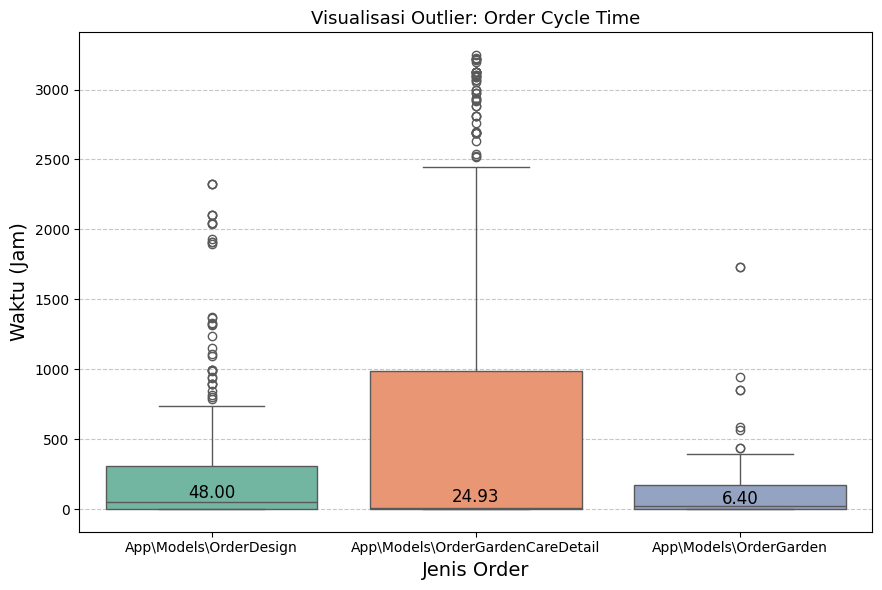

In [29]:
plt.figure(figsize=(17, 6))

# Boxplot untuk memvisualisasikan outlier
plt.subplot(1, 2, 1)
boxplot = sns.boxplot(data=proses_subject_type,x=proses_subject_type['subject_type'],y=proses_subject_type['order_cycle_time'],palette='Set2')

# Menghitung median untuk setiap kolom
medians = proses_subject_type.groupby('subject_type')['order_cycle_time'].median()

# Menambahkan angka median ke dalam boxplot
for i, median in enumerate(medians):
    boxplot.text(i, median, f'{median:.2f}', ha='center', va='bottom', fontsize=12, color='black')

plt.title('Visualisasi Outlier: Order Cycle Time', fontsize=13)
plt.xlabel('Jenis Order', fontsize=14)
plt.ylabel('Waktu (Jam)', fontsize=14)

# Menambahkan grid untuk meningkatkan keterbacaan
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Menampilkan plot
plt.tight_layout()
plt.show()

In [30]:
# Outlier time_interval_status
outliers_iqr_time_interval_status = detect_outliers_iqr(proses_subject_type, 'time_interval_status')
print("Outliers detected using IQR:")
outliers_iqr_time_interval_status.sort_values(by='time_interval_status', ascending=False).head()

Outliers detected using IQR:


,id,subject_type,subject_id,properties,created_at,updated_at,old_status,old_created_at,old_updated_at,attributes_status,attributes_created_at,attributes_updated_at,order_cycle_time,id_datetime,time_interval_status
188,15077,App\Models\OrderGardenCareDetail,347,"{""attributes"":{""id"":347,""id_order_garden_care""...",2024-11-13 09:15:43,2024-11-13 09:15:43,paid,2024-07-02 06:02:48,2024-07-02 06:02:48,acc_gardener,2024-07-02 06:02:48,2024-11-13 02:15:43,3212.2153,<NA>,3219.2153
1037,3617,App\Models\OrderGardenCareDetail,136,"{""attributes"":{""id"":136,""id_order_garden_care""...",2024-11-01 16:02:29,2024-11-01 16:02:29,paid,2024-07-02 03:21:37,2024-07-02 03:21:37,acc_gardener,2024-07-02 03:21:37,2024-11-01 09:02:29,2933.6811,8,2940.6811
1073,3498,App\Models\OrderGardenCareDetail,238,"{""attributes"":{""id"":238,""id_order_garden_care""...",2024-11-01 10:17:51,2024-11-01 10:17:51,paid,2024-07-02 03:37:07,2024-07-02 03:37:07,acc_gardener,2024-07-02 03:37:07,2024-11-01 03:17:51,2927.6789,<NA>,2934.6789
939,3819,App\Models\OrderGardenCareDetail,485,"{""attributes"":{""id"":485,""id_order_garden_care""...",2024-11-01 21:25:58,2024-11-01 21:25:58,paid,2024-07-03 02:53:33,2024-07-03 02:53:33,acc_gardener,2024-07-03 02:53:33,2024-11-01 14:25:58,2915.5403,<NA>,2922.5403
1270,1967,App\Models\OrderGardenCareDetail,459,"{""attributes"":{""id"":459,""id_order_garden_care""...",2024-10-27 16:57:17,2024-10-27 16:57:17,paid,2024-07-02 07:07:39,2024-07-02 07:07:39,acc_gardener,2024-07-02 07:07:39,2024-10-27 09:57:17,2810.8272,<NA>,2817.8272


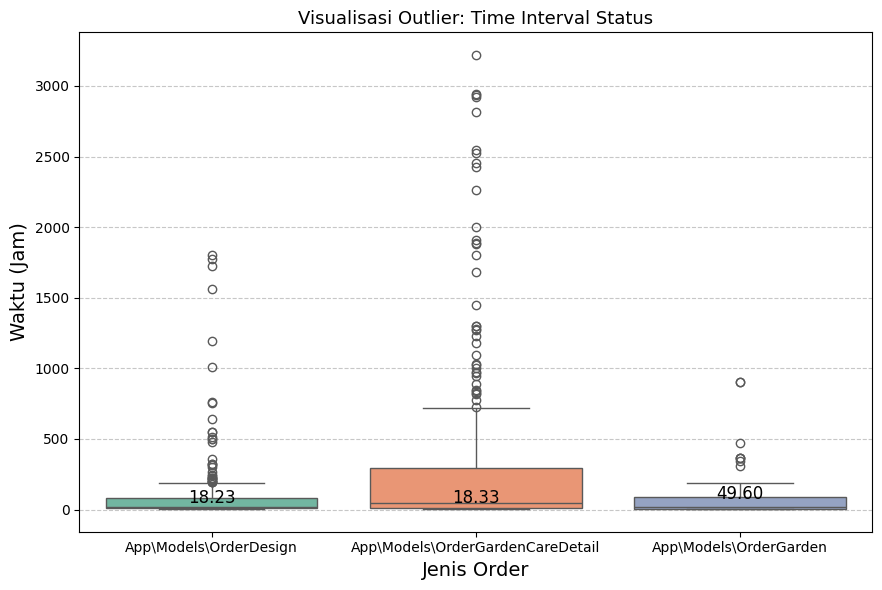

In [31]:
plt.figure(figsize=(17, 6))

# Boxplot untuk memvisualisasikan outlier
plt.subplot(1, 2, 1)
boxplot = sns.boxplot(data=proses_subject_type,x=proses_subject_type['subject_type'],y=proses_subject_type['time_interval_status'],palette='Set2')

# Menghitung median untuk setiap kolom
medians = proses_subject_type.groupby('subject_type')['time_interval_status'].median()

# Menambahkan angka median ke dalam boxplot
for i, median in enumerate(medians):
    boxplot.text(i, median, f'{median:.2f}', ha='center', va='bottom', fontsize=12, color='black')

plt.title('Visualisasi Outlier: Time Interval Status', fontsize=13)
plt.xlabel('Jenis Order', fontsize=14)
plt.ylabel('Waktu (Jam)', fontsize=14)

# Menambahkan grid untuk meningkatkan keterbacaan
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Menampilkan plot
plt.tight_layout()
plt.show()

### Pengecekan Typo Pada Column Object

In [32]:
col = proses_subject_type[['subject_type','old_status','attributes_status']]
for column in col:
    print(f"\nKolom: {column}")
    print("Nilai unik di kolom ini:")
    print(proses_subject_type[column].value_counts())
    
    print("\nTidak ditemukan kemungkinan typo pada kolom ini.\n")


Kolom: subject_type
Nilai unik di kolom ini:
subject_type
App\Models\OrderGardenCareDetail    456
App\Models\OrderDesign              283
App\Models\OrderGarden              122
Name: count, dtype: int64

Tidak ditemukan kemungkinan typo pada kolom ini.


Kolom: old_status
Nilai unik di kolom ini:
old_status
paid                  181
acc_gardener          133
in_review              66
build_start            62
in_review_internal     39
wait_freelancer        36
on_going               35
new                    33
wait_gardener          10
null                    6
expired                 1
Name: count, dtype: int64

Tidak ditemukan kemungkinan typo pada kolom ini.


Kolom: attributes_status
Nilai unik di kolom ini:
attributes_status
paid                  194
in_review             164
acc_gardener          132
new                    95
in_review_internal     63
build_start            62
wait_freelancer        37
finish                 34
on_going               34
wait_gardener          